# Обработка данных

## Загрузка необходимых библиотек

Для работы нам понадобятся две библиотеки:
1. `pandas`: при помощи нее мы считаем из файла таблицу с данными
2. `matplotlib`: библиотека для визуализации данных
3. `sklearn`: библиотека инструментов для анализа данных и машинного обучения

In [1]:
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
plt.style.use('ggplot')

## Загрузка данных
- x - обучающая выборка
- y - ответы (победила ли команда Radiant в драке)

In [2]:
k=3
data = pd.read_csv('data.csv')
data=data[data['Какая у Вас профессия, должность в Вашей компании?']!='Другое']
cat=[]
cat.append(['Product','Evangelist'])
cat.append(['Data Architect','Data Scientist','Systemcoder','BackEnd','Software Architect'])
cat.append(['FrontEnd','Game Designer','Qa','ui'])
cat.append(['Mobile','Security','Portable','robot'])

data=data[data['Какая у Вас профессия, должность в Вашей компании?'].isin(cat[k])]
Y=data['Какая у Вас профессия, должность в Вашей компании?']

In [3]:
# Y=pd.DataFrame(Y)


#### Выделим 4 категории для предпроверки.

In [4]:
for i in range(len(cat[k]) ):
    Y[Y == cat[k][i] ]=i

In [5]:
data = data.fillna('Другое')

# print(data)

del data['Какая у Вас профессия, должность в Вашей компании?']
del data['6)Что Вы видите на картинке? (необязательный вопрос)']
del data['9)Что Вы видите на картинке? (необязательный вопрос)']
del data['Если У Вас где-то выбран ответ "иное", то напишите номер картинки и ваш ответ сюда']
del data['Отметка времени']
# data=pd.get_dummies(data) 
for column in data:
    m=pd.unique(data[column])
    try:
        le = preprocessing.LabelEncoder()
        le.fit(m)
#         print(m)
        data[column]=le.transform(data[column])
    except:
        1
X=data

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size=.15, random_state=1)

In [7]:
from catboost import Pool, CatBoostClassifier
model = CatBoostClassifier(iterations=200, depth=5, loss_function='MultiClass')
model.fit(x_train,y_train)

0:	learn: -1.3608680	total: 78.9ms	remaining: 15.7s
1:	learn: -1.3480437	total: 97.9ms	remaining: 9.69s
2:	learn: -1.3314476	total: 114ms	remaining: 7.5s
3:	learn: -1.3165332	total: 130ms	remaining: 6.35s
4:	learn: -1.3040944	total: 145ms	remaining: 5.64s
5:	learn: -1.2876233	total: 160ms	remaining: 5.16s
6:	learn: -1.2740318	total: 172ms	remaining: 4.73s
7:	learn: -1.2606766	total: 183ms	remaining: 4.4s
8:	learn: -1.2493592	total: 198ms	remaining: 4.21s
9:	learn: -1.2382769	total: 214ms	remaining: 4.06s
10:	learn: -1.2193069	total: 228ms	remaining: 3.92s
11:	learn: -1.2046899	total: 243ms	remaining: 3.81s
12:	learn: -1.1907489	total: 258ms	remaining: 3.71s
13:	learn: -1.1801005	total: 278ms	remaining: 3.7s
14:	learn: -1.1626831	total: 297ms	remaining: 3.66s
15:	learn: -1.1515921	total: 313ms	remaining: 3.59s
16:	learn: -1.1408536	total: 328ms	remaining: 3.53s
17:	learn: -1.1313164	total: 343ms	remaining: 3.47s
18:	learn: -1.1200942	total: 352ms	remaining: 3.35s
19:	learn: -1.1102031	t

159:	learn: -0.4120308	total: 2.98s	remaining: 745ms
160:	learn: -0.4093623	total: 3s	remaining: 726ms
161:	learn: -0.4070333	total: 3.02s	remaining: 708ms
162:	learn: -0.4041615	total: 3.04s	remaining: 690ms
163:	learn: -0.4010075	total: 3.06s	remaining: 671ms
164:	learn: -0.3986720	total: 3.08s	remaining: 653ms
165:	learn: -0.3964210	total: 3.1s	remaining: 634ms
166:	learn: -0.3939473	total: 3.11s	remaining: 614ms
167:	learn: -0.3918459	total: 3.13s	remaining: 596ms
168:	learn: -0.3890780	total: 3.15s	remaining: 577ms
169:	learn: -0.3867060	total: 3.17s	remaining: 559ms
170:	learn: -0.3846718	total: 3.19s	remaining: 541ms
171:	learn: -0.3817921	total: 3.21s	remaining: 522ms
172:	learn: -0.3800906	total: 3.23s	remaining: 504ms
173:	learn: -0.3781647	total: 3.24s	remaining: 485ms
174:	learn: -0.3762661	total: 3.26s	remaining: 466ms
175:	learn: -0.3744262	total: 3.28s	remaining: 447ms
176:	learn: -0.3729714	total: 3.3s	remaining: 428ms
177:	learn: -0.3710720	total: 3.31s	remaining: 410m

In [8]:
model.predict(x_train[:15])

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

Список признаков, которые будут использованы в модели

Важность признаков

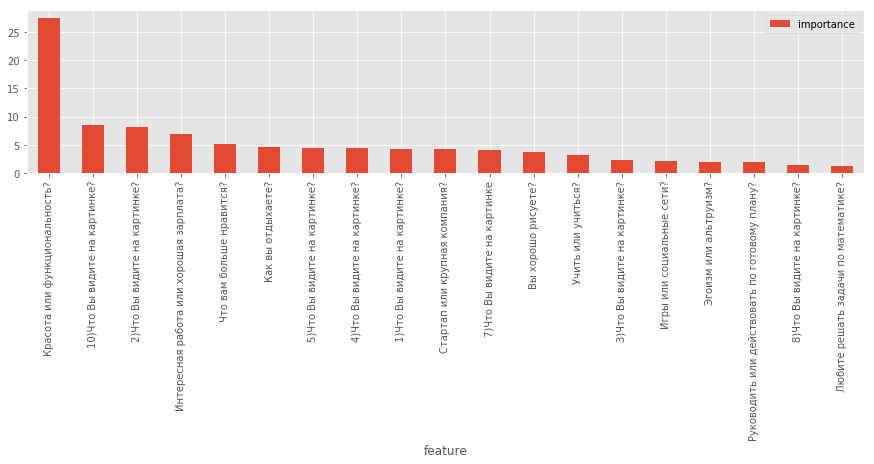

,importance
feature,
Красота или функциональность?,27.578374
10)Что Вы видите на картинке?,8.461498
2)Что Вы видите на картинке?,8.074651
Интересная работа или хорошая зарплата?,6.852069
Что вам больше нравится?,5.059640
Как вы отдыхаете?,4.662727
5)Что Вы видите на картинке?,4.504966
4)Что Вы видите на картинке?,4.404577
1)Что Вы видите на картинке?,4.237241


In [9]:
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
if hasattr(model, 'coef_'):
    df_importances = sorted(list(zip(X.columns, model.coef_.ravel())), key=lambda tpl: tpl[1], reverse=True)
else:
    df_importances= sorted(list(zip(X.columns, np.array(model.feature_importances_).ravel())), key=lambda tpl: tpl[1], reverse=True)
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance'])
df_importances = df_importances.set_index('feature')
df_importances.plot(kind='bar', figsize=(15, 3))
plt.show()
display(df_importances)

In [10]:
import joblib
joblib_file = "m"+str(k+1)+".pkl"  
joblib.dump(model, joblib_file)

['m4.pkl']

Конец